<div style="background-color:#bf283c;">
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <h1 style="color:White;font-family:'Arial';font-size:30px"><center>Bike Sharing Assignment</center></h1>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <p style="text-align:left;font-family:'Courier New';color:FloralWhite;font-size:16px"> | PGP in Machine Learning and AI |
        <span style="float:right;font-family:'Courier New';color:White;font-size:16px"> | In partner with UpGrad platform |
        </span>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
</div>



-----

### <ins>[1](#1.-Case-Study-Overview).1 Problem Statement:</ins>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

+ Which variables are significant in predicting the demand for shared bikes.
+ How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### <ins>[1](#1.-Case-Study-Overview).2 Business Goal:</ins>

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### <ins>[1](#1.-Case-Study-Overview).3 Table of contents:</ins>

The analysis is divided into the following sections:

+ Data understanding and exploration
+ Data Visualisation
+ Data preparation
+ Model building and evaluation

### <ins>[1](#1.-Case-Study-Overview).4 Software requirements:</ins>

<p style="text-align:justify">
This case study uses `Python 3.10` version and is designed to be compatible with versions greater than '3.6'. It is highly recommended that you use the `Anaconda` distribution to install Python, since the distribution includes all necessary Python libraries as well as Jupyter Notebooks. The following libraries are expected to be used in this project:
</p>

+ NumPy
+ Pandas
+ Matplotlib
+ Seaborn
+ Math
+ Conda
+ Git
+ Jupyter Notebook
+ Statsmodels
+ Scikit learn

**NOTE:**

<p style="text-align:justify">An <mark>environment.yaml</mark> file is provided to install all the necessary libraries in the environment to replicate the same work flow.</p>

-----

## 2. `Exploratory Data Analysis`
=========================================

  + 2.1. [Load Libraries](#2.1-Load-Libraries:)
  + 2.2. [Load Data](#2.2-Load-Data:)
  + 2.2. [Data Dictionary](#2.2-Dictionary-Exploration:)
  + 2.3. [Dataset Exploration](#2.3-Dataset-Exploration:)

### <ins>[2](#2.-Explore-Data).1 Load Libraries:</ins>

Import the necessary libraries.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

### <ins>[2](#2.-Explore-Data).2 Load Data:</ins>

Explore data dictionary to understand the variables:

#### Data dictionary
--------------------

`day.csv` have the following fields:
	
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

Load the main dataset.

In [2]:
# Load the data from csv file
df = pd.read_csv("day.csv", delimiter = ',')
df.shape

(730, 16)

Visually inspect the data:

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Statistically exploration of data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <ins>[2](#2.-Explore-Data).3 Understand Dataset:</ins>

In [7]:
pd.DataFrame(df.dtypes).reset_index().rename(columns={'index': 'variable', 0: 'datatype'}).style

,variable,datatype
0,instant,int64
1,dteday,object
2,season,int64
3,yr,int64
4,mnth,int64
5,holiday,int64
6,weekday,int64
7,workingday,int64
8,weathersit,int64
9,temp,float64


In [8]:
def programmatic_assessment(df):
    '''
    Returns a dataframe with variables as null counts, duplicate counts, and descriptive statistics of each variable/column in the input dataframe.
    
    Input args:
    df = dataframe
    
    output args:
    df = dataframe tabulating statistics of each variable.
    '''
    cols = df.columns
    assess_df = pd.DataFrame()
    
    for i, col in enumerate(cols):
        assess_df.loc[i, 'variable'] = col
        assess_df.loc[i, 'datatype'] = df[col].dtype
        assess_df.loc[i, 'null_count'] = df[col].isna().sum()
        assess_df.loc[i, 'duplicate_count'] = df[col].duplicated().sum()
        assess_df.loc[i, 'count'] = df[col].describe()['count']

        # tabulate descriptive statistics for numerical variable
        if df[col].dtype in ['int64', 'float64']:
            assess_df.loc[i, 'mean'] = df[col].describe()['mean']
            assess_df.loc[i, 'std'] = df[col].describe()['std']
            assess_df.loc[i, 'min'] = df[col].describe()['min']
            assess_df.loc[i, '25%'] = df[col].describe()['25%']
            assess_df.loc[i, '50%'] = df[col].describe()['50%']
            assess_df.loc[i, '75%'] = df[col].describe()['75%']
            assess_df.loc[i, 'max'] = df[col].describe()['max']
        
        # tabulate descriptive statistics for categorical variable
        elif df[col].dtype in ['O']:
            assess_df.loc[i, 'unique'] = df[col].describe()['unique']
            assess_df.loc[i, 'top'] = df[col].describe()['top']
            assess_df.loc[i, 'freq'] = df[col].describe()['freq']
    
    return assess_df

In [9]:
def highlight_positives(x, color):
    '''
    highlight values greater than 0 in the input column of the dataframe.
    
    input args:
    color: color of the text to be displayed.
    '''
    return np.where(x > 0, f"color: {color};", None)

In [10]:
assess_df = programmatic_assessment(df)

In [11]:
assess_df.style.apply(highlight_positives, color='red', axis=1, subset="null_count")  

,variable,datatype,null_count,duplicate_count,count,mean,std,min,25%,50%,75%,max,unique,top,freq
0,instant,int64,0.000000,0.000000,730.000000,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000,nan,nan,nan
1,dteday,object,0.000000,0.000000,730.000000,nan,nan,nan,nan,nan,nan,nan,730.000000,14-04-2019,1.000000
2,season,int64,0.000000,726.000000,730.000000,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000,nan,nan,nan
3,yr,int64,0.000000,728.000000,730.000000,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000,nan,nan,nan
4,mnth,int64,0.000000,718.000000,730.000000,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000,nan,nan,nan
5,holiday,int64,0.000000,728.000000,730.000000,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000,nan,nan,nan
6,weekday,int64,0.000000,723.000000,730.000000,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000,nan,nan,nan
7,workingday,int64,0.000000,728.000000,730.000000,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000,nan,nan,nan
8,weathersit,int64,0.000000,727.000000,730.000000,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000,nan,nan,nan
9,temp,float64,0.000000,232.000000,730.000000,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347,nan,nan,nan


### Data Cleaning

Modify the `season` variable into categorical data. As numeriacl values are assigned to them, they might infer some statistically priority to the categories based on the number assosiated to them

In [12]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring, 2=summer, 3=fall, 4=winter
df.loc[(df['season'] == 1), 'season'] = 'spring'
df.loc[(df['season'] == 2), 'season'] = 'summer'
df.loc[(df['season'] == 3), 'season'] = 'fall'
df.loc[(df['season'] == 4), 'season'] = 'winter'

df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

Assigning string values to different months instead of numeric values which may misindicate some order to it.

In [13]:
df['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [14]:
def month_map(x):
    '''
    maps the actual numbers to categorical levels.
    '''
    dict_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    return x.map(dict_map)

# Applying the function to the month column
df[['mnth']] = df[['mnth']].apply(month_map)
df['mnth'].value_counts()

Oct     62
Mar     62
Aug     62
May     62
Jul     62
Dec     62
Jan     62
Jun     60
Nov     60
Sept    60
Apr     60
Feb     56
Name: mnth, dtype: int64

Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.

In [15]:
def week_map(x):
    '''
    maps the actual numbers to categorical levels.
    '''
    dict_map = {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
    return x.map(dict_map)

# Applying the function to the two columns
df[['weekday']] = df[['weekday']].apply(week_map)

df['weekday'].value_counts()

Tues     105
Mon      105
Wed      105
Sun      104
Sat      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [16]:
# year (0: 2018, 1:2019)
df['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [17]:
# whether day is a holiday or not (0: No, 1: Yes)
df['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [18]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
df['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

Replacing long `weathersit` names into string values for better readability and understanding

In [21]:
# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
df.loc[(df['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
df.loc[(df['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
df.loc[(df['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df.loc[(df['weathersit'] == 4) , 'weathersit'] = 'D'

In [22]:
df['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

### Data Visualisation


<ins>Exploratory Data Ananlysis</ins>
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn` libraries.

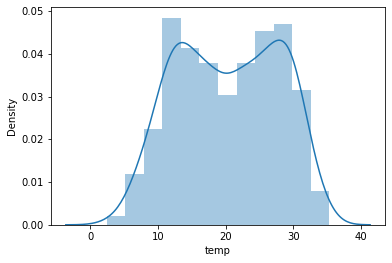

In [24]:
# temperature
sns.distplot(df['temp'])
plt.show()

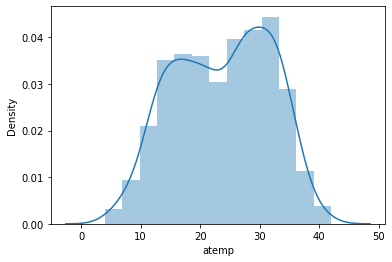

In [25]:
# feeling temperature
sns.distplot(df['atemp'])
plt.show()

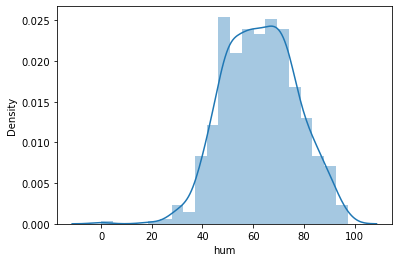

In [26]:
# humidity
sns.distplot(df['hum'])
plt.show()

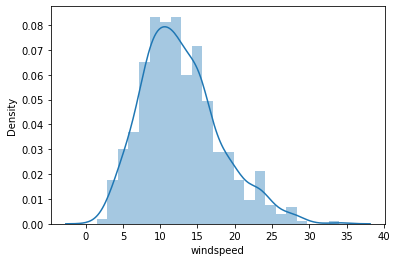

In [27]:
# wind speed
sns.distplot(df['windspeed'])
plt.show()

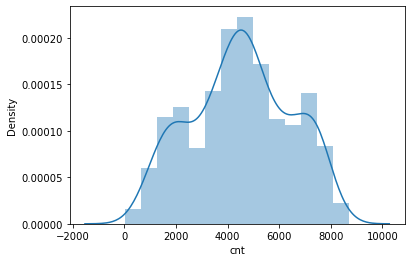

In [28]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(df['cnt'])
plt.show()

In [29]:
# Converting date to datetime format
df['dteday'] = df['dteday'].astype('datetime64')

In [30]:
# categorical variables in the dataset
df_categorical = df.select_dtypes(exclude=['float64','datetime64','int64'])
print(df_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [31]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,Sun,B
727,spring,Dec,Mon,B
728,spring,Dec,Tues,A


#### Visualising Categorical Variables

> As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

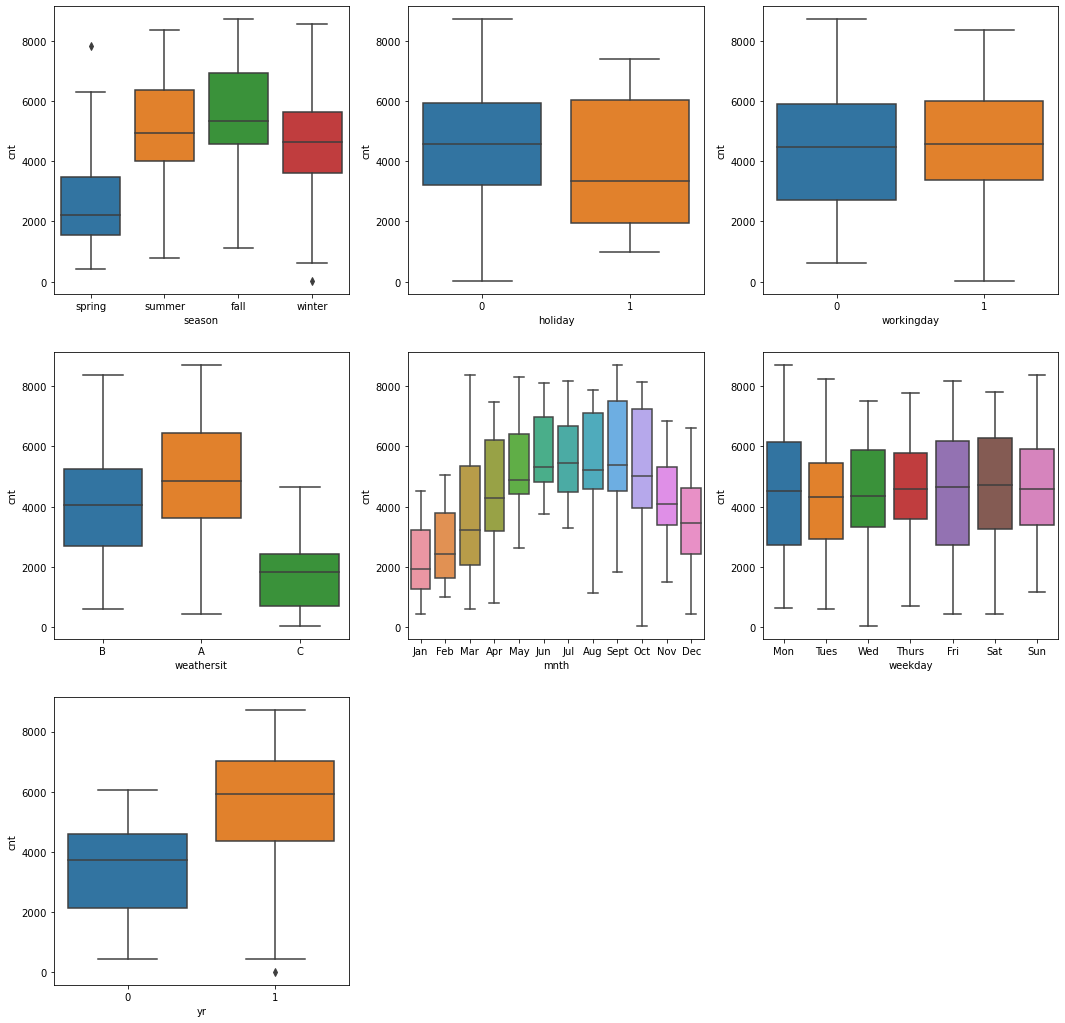

In [33]:
plt.figure(figsize=(18, 18))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show();

#### Visualising Numeric Variables

> Let's make a pairplot of all the numeric variables

Converting `casual`, `registered` and `cnt` numeric variables to float. This step is performed to seperate out categorical variables like `yr`, `holiday`, `workingday` which have binary values in them.

In [34]:
numerical_variables = ["casual","registered","cnt"]

for var in numerical_variables:
    df[var] = df[var].astype("float")

In [35]:
# numerical variables in the dataset
df_numeric = df.select_dtypes(include=['float64'])
df_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


Plot pair plot for analysis:

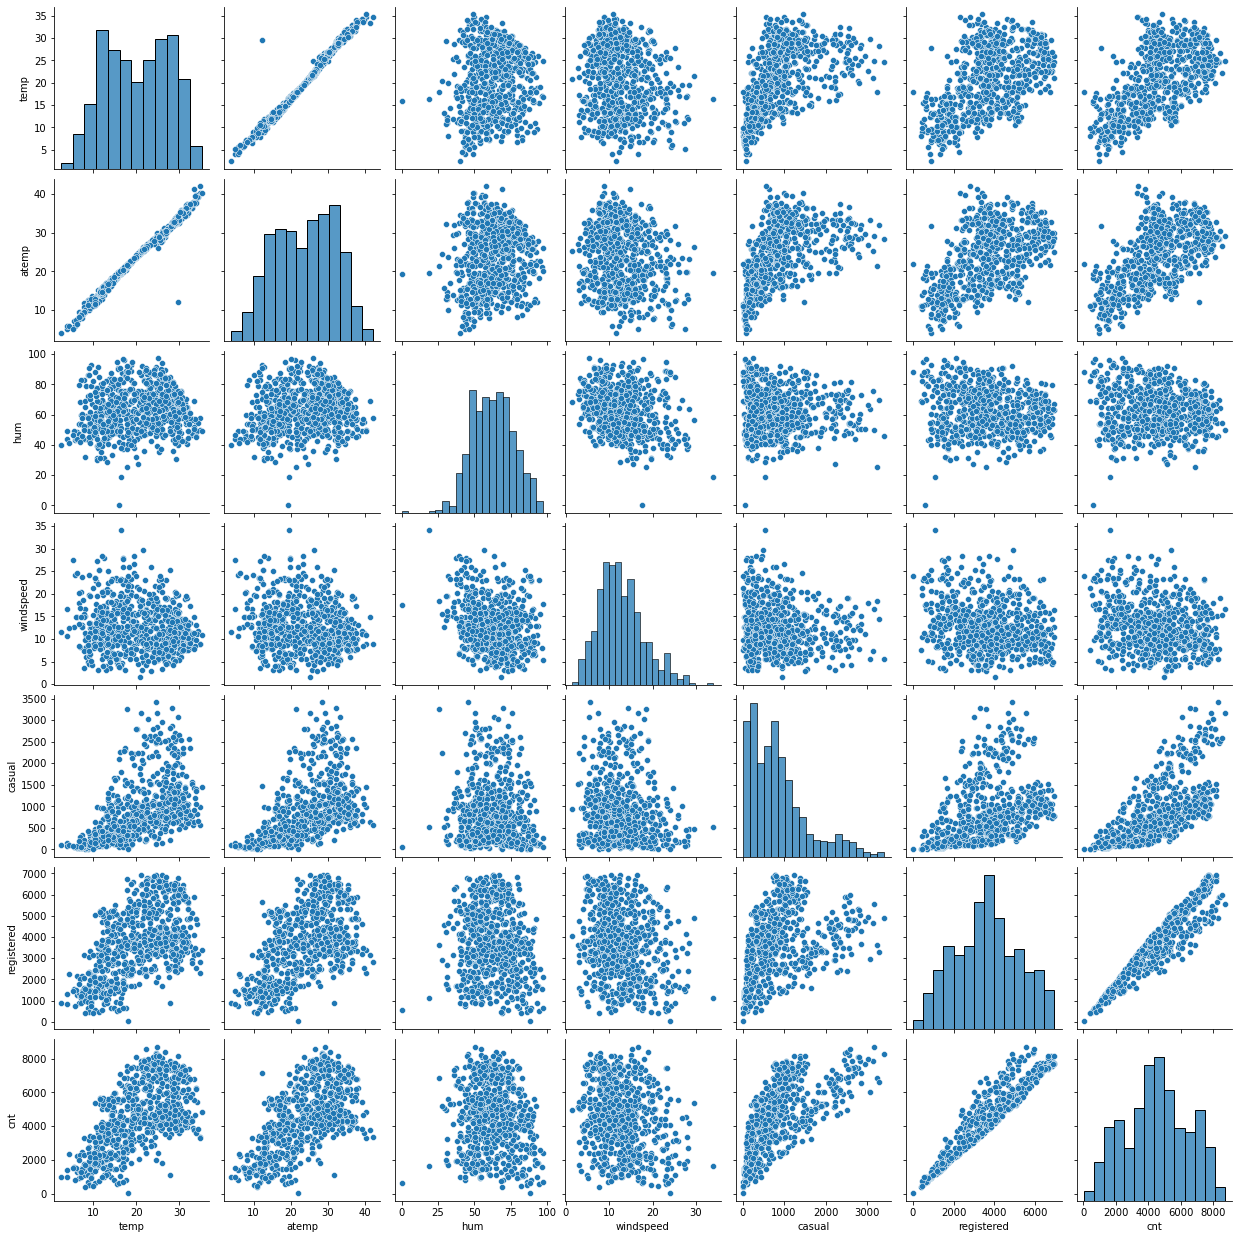

In [36]:
# Pairwise scatter plot
sns.pairplot(df_numeric)
plt.show();

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

Calculate correlation matrix

In [37]:
# Correlation matrix
cor = df_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


Let's plot the correlations on a heatmap for better visualisation

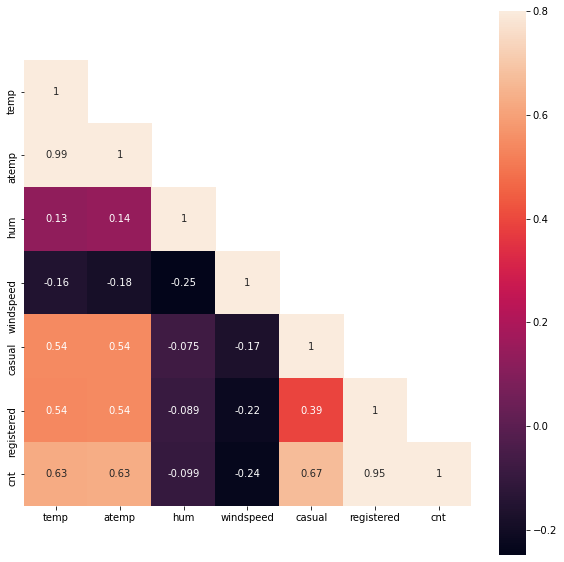

In [38]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)
plt.show();

<b><ins>Insights: </ins></b>

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [40]:
# removing the column `atemp` as it is highly correlated with `temp` column
df.drop('atemp',axis=1,inplace=True) 

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

---

## Data Preparation 

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [41]:
# Subset all categorical variables
df_categorical = df.select_dtypes(include=['object'])

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [42]:
# Convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Drop categorical variable columns
df = df.drop(list(df_categorical.columns), axis=1)

In [44]:
# Concatenate dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

In [45]:
# Let's check the first few rows
df.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
df = df.drop(['instant','dteday'], axis = 1, inplace = False)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


---

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [47]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)

df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,1,0,0,0,0,0,1,0


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler. You can use any other scaling method as well; it is totally up to you.

In [49]:
from sklearn.preprocessing import MinMaxScaler 

In [50]:
scaler = MinMaxScaler()

In [51]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [52]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,1,0,0,0,0,0,1,0


As expected, the variables have been appropriately scaled.

In [53]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


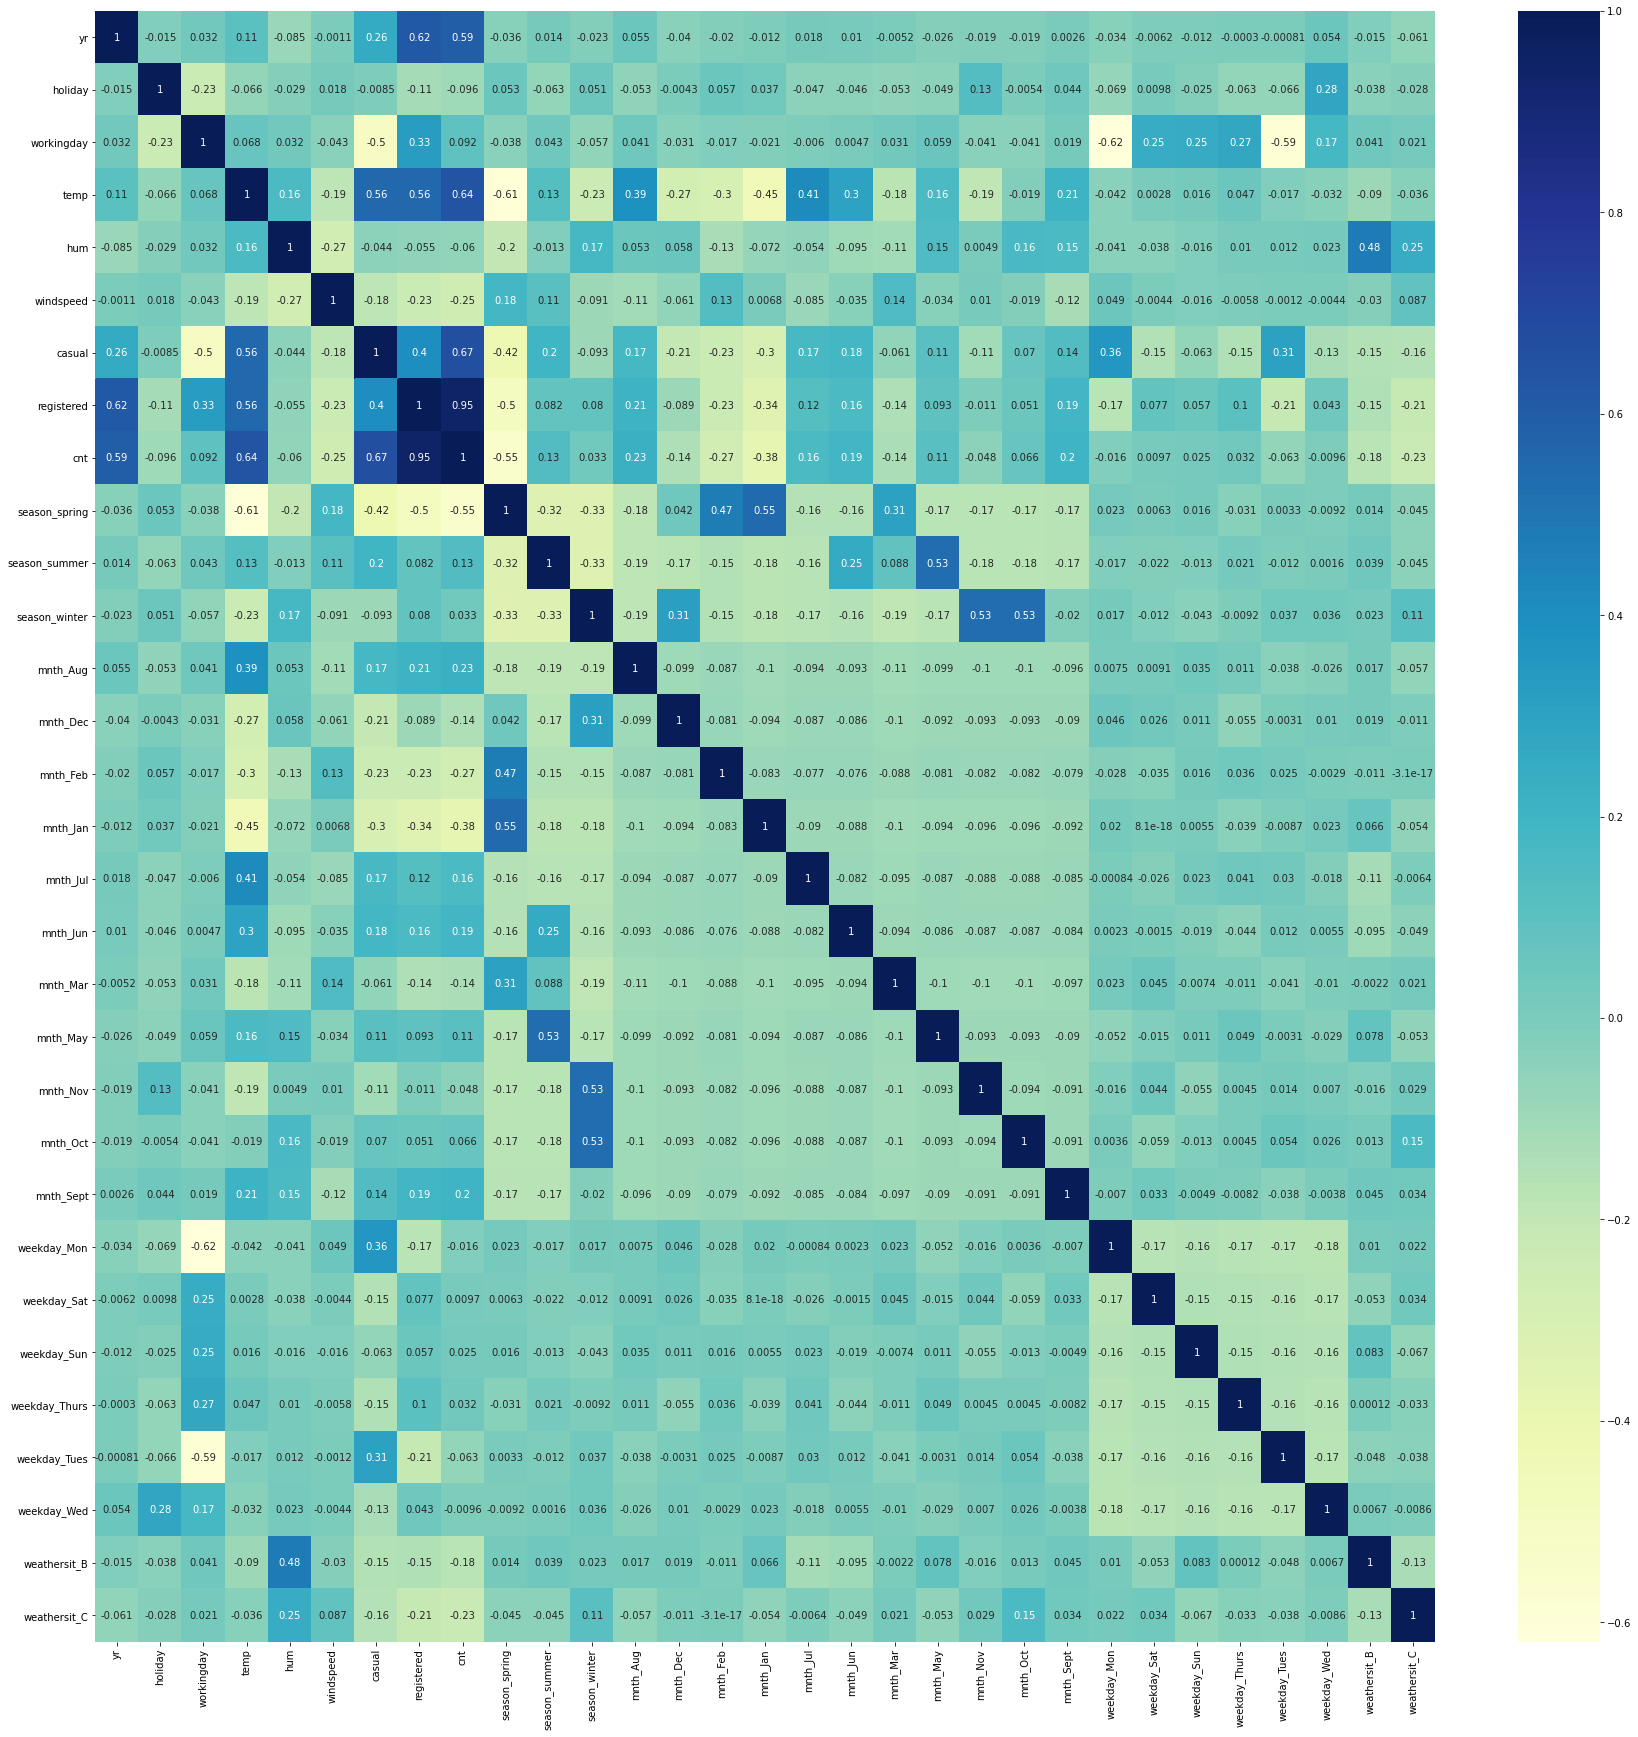

In [54]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most, after 'casual' and 'registered'. Let's see a pairplot for `temp` vs `cnt`.

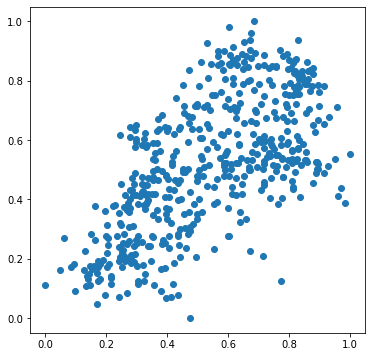

In [55]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show();

#### Dividing into X and Y sets for the model building

In [56]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [57]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [58]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [59]:
X_train.shape

(510, 28)

### Building the first model with all the features

Let's now build our first model with all the features.

In [60]:
import statsmodels.api as sm

In [61]:
X_train_lm = sm.add_constant(X_train)

In [62]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [63]:
lr.params

const            0.242930
yr               0.232116
holiday          0.006726
workingday       0.093651
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon      0.098544
weekday_Sat     -0.003849
weekday_Sun      0.005388
weekday_Thurs   -0.013502
weekday_Tues     0.044008
weekday_Wed     -0.015519
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [64]:
# Instantiate
lm = LinearRegression()

In [65]:
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [66]:
# Print the coefficients and intercept
print('coefficients:')
print(lm.coef_)
print('')
print('intercept: ', lm.intercept_)

coefficients:
[ 2.32222269e-01  5.86273244e+11  5.86273244e+11  4.50597873e-01
 -1.51613822e-01 -1.86532562e-01 -4.83346123e-02  3.84962092e-02
  1.05910876e-01  1.40772031e-02 -4.56521135e-02 -3.21133300e-02
 -6.26341574e-02 -4.05223248e-02 -3.05168574e-03  1.17167861e-03
  2.39959983e-02 -4.19160792e-02  7.56761162e-03  8.10349988e-02
  5.86273244e+11 -3.67630130e-03  5.39255563e-03 -1.34318064e-02
  5.86273244e+11 -1.54656522e-02 -6.10079080e-02 -2.57337578e-01]

intercept:  -586273244435.6692


In [67]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          8.74e-182
Time:                        22:59:19   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.035      6.854      0.000       0.173       0.313
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0067      0.024      0.278      0.781      -0.041       0.054
workingday        0.0937      0.012      7.783      0.000       0.070       0.117
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon       0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat      -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun       0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs    -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues      0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed      -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.28e+16
================================================================

This model has an Adjusted R-squared value of **84.5%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable. 

----

### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [68]:
# Import RFE
from sklearn.feature_selection import RFE

In [69]:
# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15,step=1)

In [70]:
# Fit with 15 features
rfe1.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [71]:
# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  7  8  1  1]


#### Model Building and Evaluation 
Let's now check the summary of this model using `statsmodels`.

In [72]:
# Import statsmodels
import statsmodels.api as sm  

In [73]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

In [74]:
# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

In [75]:
# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sept,weekday_Mon,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0


In [76]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   

In [77]:
# Display summary
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.31e-191
Time:                        23:01:35   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.5%** to **84.4%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
a=X_train_rfe1.drop('const',axis=1)

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_B,2.29
0,yr,2.09
12,weekday_Mon,1.98


In [81]:
# Import RFE
from sklearn.feature_selection import RFE

In [82]:
# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(lm, 7)

In [83]:
# Fit with 7 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [84]:
# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_) 

[ True False False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  2  8  1  1  1  1  6  3 14 11 12  9  1 21 22 13 10 18  4  7 20 19 17
 15 16  5  1]


In [85]:
# Import statsmodels
import statsmodels.api as sm  

In [86]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

In [87]:
# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

In [88]:
# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0


In [89]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.34e-178
Time:                        23:03:15   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348

Now let's check the VIF for these selected features and decide further.

In [90]:
b = X_train_rfe2.drop('const', axis=1)

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_Jul,1.35
6,weathersit_C,1.11


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [92]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [93]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   

In [94]:
# Display summary
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          1.37e-168
Time:                        23:04:17   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2596      0.020     12.986

The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [95]:
c = X_train_rfe2.drop('const', axis=1)

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,season_spring,1.49
4,mnth_Jul,1.26
5,weathersit_C,1.04


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.5%` with **28 variables** to just `79.1%` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

-----

## Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [97]:
y_train_cnt = lm3.predict(X_train_rfe2)

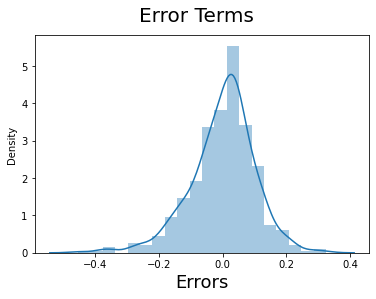

In [98]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)

# Plot heading
fig.suptitle('Error Terms', fontsize = 20)  

# Give the X-label
plt.xlabel('Errors', fontsize = 18) 
plt.show();

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

----

## Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [99]:
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [100]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [101]:
df_test[var] = scaler.transform(df_test[var])

In [102]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [103]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [104]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_Jul', 'weathersit_C'], dtype='object')

In [105]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [106]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   windspeed      219 non-null    float64
 4   season_spring  219 non-null    uint8  
 5   mnth_Jul       219 non-null    uint8  
 6   weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 9.2 KB


In [107]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

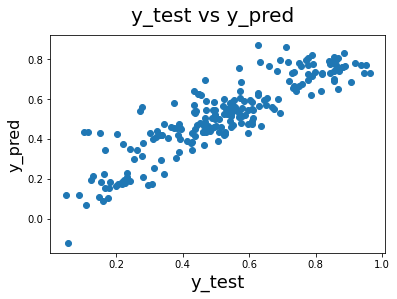

In [108]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 20)              
# plot lables
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show();

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [109]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7802124353228018

Thus, for the model with 6 variables, the r-squared on training and test data is about 79.3% and 78.02% respectively. The adjusted r-squared on the train set is about is about 79.1%.

### Checking the correlations between the final predictor variables

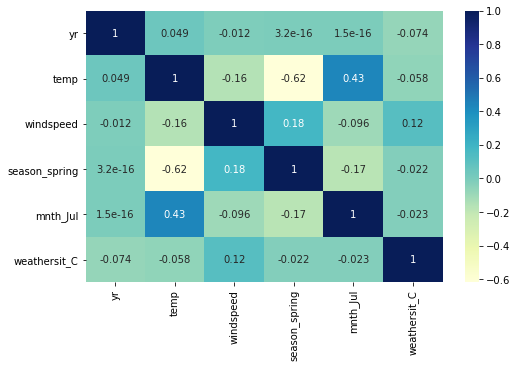

In [111]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(df[col2].corr(), cmap="YlGnBu", annot=True)
plt.show();

> + This is the simplest model that we could build. 
> + The final predictors seem to have fairly low correlations. 
> + Thus, the final model consists of the 6 variables mentioned above. 
> + This model can be used for predicting the count of daily bike rentals.

----

## `Credentials:`
===================

Please find the author details below:
> **Author:**
> + Name: Vamsi Krishna P 
> + Email ID: vamshi.krishna.prime@gmail.com 
> + Phone no: 9491392912 
> + Batch: ML C58

---

<div style="background-color:#bf283c;">
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <h2 style="color:White;font-family:'Arial';font-size:30px"><center>End of Assignment</center></h2>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
</div>

